# Setup#

In [ ]:
# Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy,TopKCategoricalAccuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Read in data
path = "/content/drive/MyDrive/Satellite_Data"
classes = ["cloudy","desert","green_area","water"]

dataset =tf.keras.utils.image_dataset_from_directory(
    path,
    labels='inferred',
    label_mode='categorical',
    class_names=classes,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=99
)

Found 5631 files belonging to 4 classes.


In [ ]:
# Split the data into Training, Validation, and Test sets
def splits(dataset, train_ratio, val_ratio, test_ratio):
    Data_size = len(dataset)
    train_size = int(train_ratio * Data_size)
    val_size = int(val_ratio * Data_size)
    test_size = int(test_ratio * Data_size)

    train_dataset = dataset.take(train_size)
    val_test_dataset = dataset.skip(train_size)
    val_dataset = val_test_dataset.take(val_size)
    test_dataset = val_test_dataset.skip(val_size).take(test_size)

    return train_dataset, val_dataset, test_dataset

train_ratio =0.70
val_ratio = 0.15
test_ratio =0.15

train,val,test = splits(dataset,train_ratio,val_ratio,test_ratio)

# Data Visualization

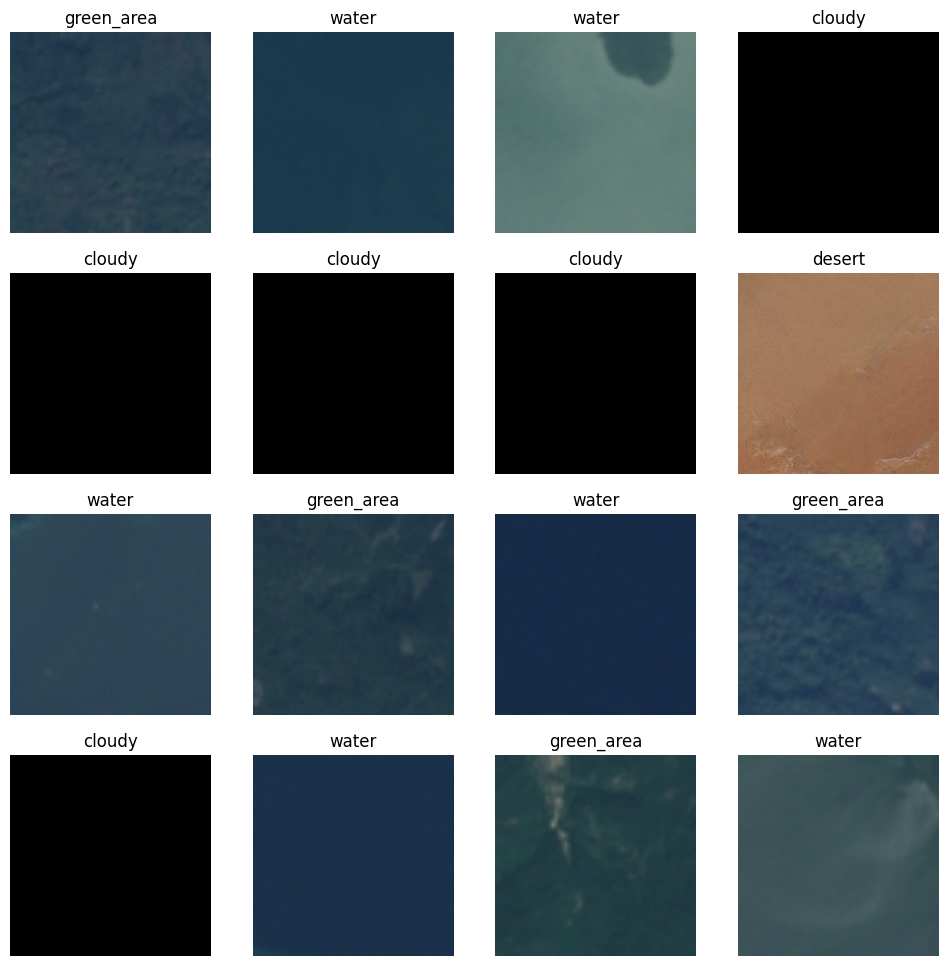

In [ ]:
plt.figure(figsize = (12,12))

for images, labels in dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)
    plt.title(classes[tf.argmax(labels[i],axis=0).numpy()])
    plt.axis("off")


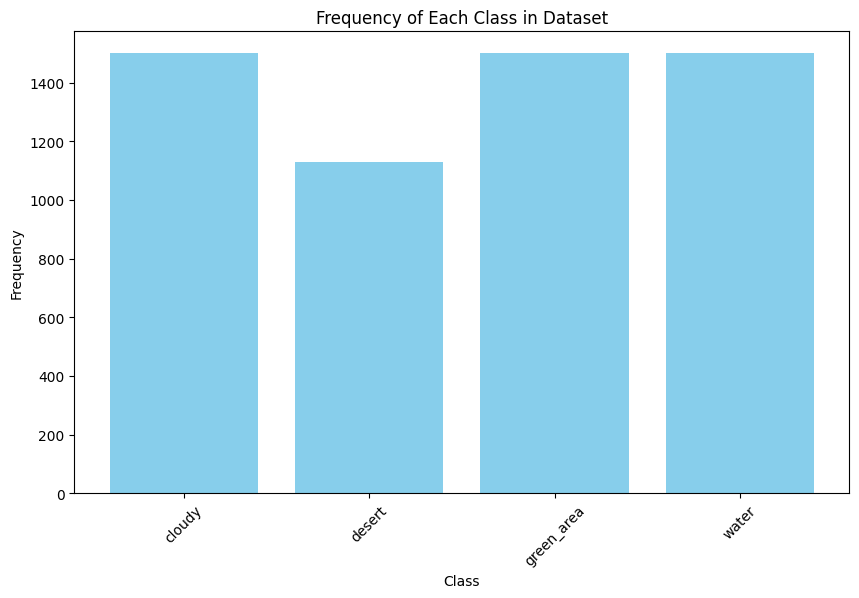

In [ ]:
# Initialize class count
class_count = {class_name: 0 for class_name in classes}

# Count occurrences of each class
for images, labels in dataset:
    for label in labels:
        class_name = classes[tf.argmax(label).numpy()]
        class_count[class_name] += 1

# Create a DataFrame for visualization
df = pd.DataFrame(list(class_count.items()), columns=['Class', 'Count'])

# Plot the frequency of each class
plt.figure(figsize=(10, 6))
plt.bar(df['Class'], df['Count'], color='skyblue')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class in Dataset')
plt.xticks(rotation=45)
plt.show()

# CNN Model

In [ ]:
# Build the model
model = Sequential([
    layers.Input(shape=(256, 256, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# Model Architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [ ]:
# Train the Model
history = model.fit(
    train,
    validation_data=val,
    epochs=5
)


# Test Model
test_loss, test_accuracy = model.evaluate(test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/5
123/123 [==============================] - 321s 3s/step - loss: 0.1706 - accuracy: 0.9187 - val_loss: 0.1854 - val_accuracy: 0.9159
Epoch 2/5
123/123 [==============================] - 318s 3s/step - loss: 0.1589 - accuracy: 0.9266 - val_loss: 0.1578 - val_accuracy: 0.9375
Epoch 3/5
123/123 [==============================] - 312s 3s/step - loss: 0.1528 - accuracy: 0.9319 - val_loss: 0.2077 - val_accuracy: 0.9062
Epoch 4/5
123/123 [==============================] - 311s 3s/step - loss: 0.1790 - accuracy: 0.9169 - val_loss: 0.2191 - val_accuracy: 0.9014
Epoch 5/5
26/26 [==============================] - 100s 3s/step - loss: 0.1217 - accuracy: 0.9459
Test Accuracy: 94.59%


# Performances

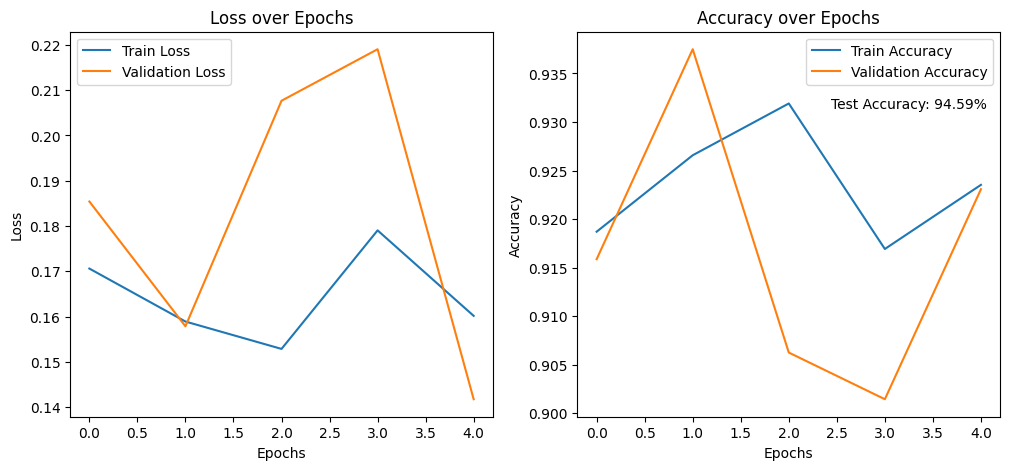

In [ ]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.annotate(f'Test Accuracy: {test_accuracy * 100:.2f}%', xy=(0.6, 0.8), xycoords='axes fraction',
             fontsize=10)

plt.show()

# Improvements

## Transfer Learning

A machine learning technique where a pre-trained model developed for one task is reused as the starting point for a model on a second task.

- Reduces Training Time: the model is already pre-trained on a large dataset

- Improved Accuracy: Pre-trained models have learned rich feature representations from large datasets, which can improve the performance on the new task.

- Lower Data Requirements: Transfer learning can help achieve good performance with limited data, as the pre-trained model has already captured useful patterns and features.

- Better Generalization: The model can generalize better to new data because it has been trained on a large and diverse dataset initially.



## CCN Architecture

Neural network (NN) architecture refers to the structure and design of a neural network.

### Key Components of Neural Network Architecture

1. Input Layer
   - Receives the input data.

2. Hidden Layers
   - Layers between the input and output layers.
   - Can be one or more layers, each with a specified number of neurons.
   - The depth (number of hidden layers) and width (number of neurons per layer) are important aspects.

3. Output Layer
   - The final layer that produces the output of the network.
   - The number of neurons corresponds to the number of output classes or the desired output dimensions.

4. Neurons
   - Basic units in each layer that perform calculations.
   - Each neuron applies a weighted sum of its inputs followed by an activation function.

5. Activation Functions
   - Functions applied to the output of each neuron to introduce non-linearity.
   - Common activation functions include ReLU, sigmoid, and tanh.

6. Weights and Biases
   - Parameters that are adjusted during training.
   - Weights determine the strength of connections between neurons.
   - Biases allow the activation function to be shifted.

7. Layer Types
   - Dense (Fully Connected) Layer: Each neuron is connected to every neuron in the previous layer.
   - Convolutional Layer: Used in CNNs for processing grid-like data such as images.
   - Recurrent Layer: Used in RNNs for sequential data processing.

### Implementing Architectures:
- *ResNet*
- GoogleNet
- TabNet

## Hyperparameter Tuning
Stride Length:
- The number of pixels the filter moves across the input matrix between applications during convolution or pooling operations.

Kernel Size:
- The dimensions of the filter applied to the input data in convolutional layers, usually specified as height x width.

Padding
- The addition of extra pixels around the input matrix to control the spatial size of the output, commonly used to maintain the input size after convolution.

Batch Size
- The number of training samples processed simultaneously before the model's internal parameters are updated.

Pool Size
- The size of the window in pooling layers used to down-sample the dimensions of the input.

Epochs
-  The number of complete passes through the entire training dataset during the training process.
Early Stopping
- A technique to stop training when a monitored metric (e.g., validation loss) stops improving to prevent overfitting.

### Tuning Methods

Grid Search
- Definition: An exhaustive search method for hyperparameter tuning where all possible combinations of specified hyperparameters are systematically tested.
- Pros: Simple to implement and guarantees finding the optimal combination within the specified range.
- Cons: Computationally expensive and time-consuming, especially with a large number of hyperparameters or values.

Random Search
- Definition: A hyperparameter tuning method where random combinations of hyperparameters are sampled and evaluated.
- Pros: Often more efficient than grid search as it explores a wider range of hyperparameters and can discover good combinations faster.
- Cons: Does not guarantee finding the optimal solution but can find good solutions more quickly with fewer evaluations.

Bayesian Optimization
- Definition: An advanced hyperparameter tuning method that builds a probabilistic model of the objective function and uses it to select the most promising hyperparameters to evaluate.
- Pros: More efficient than grid and random search as it intelligently explores the hyperparameter space, often requiring fewer evaluations to find optimal or near-optimal solutions.
- Cons: More complex to implement and requires more computational overhead for building and updating the probabilistic model.


## Creating your own CNN
General guidelines:
1. Start small (simple)
2. Activation function (tldr; ReLU)
3. Depth of model (tldr; add more layers until overfitting)
  - Kernel size (tldr; 3x3 and/or 1x1)
  - Padding (tldr; padding = same)
  - Use hyperparameter tuning for width and strides length
4. Add batch normalization between layers (tldr; use L2 regularization)
6. Add pooling layers (tldr; use MaxPooling)
  - Use hyperparameter tuning for pooling size
7. Training duration / epochs (tldr; use early stopping)
7. Choose batch size (tldr; start with 32 and test with multiples of 2: i.e. 16 or 64).


# Resources

- https://www.youtube.com/watch?v=nmnaO6esC7c&list=PLWKotBjTDoLj3rXBL-nEIPRN9V3a9Cx07
